In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


if we have two files one for training and other for testing

In [2]:
# Url="https://raw.githubusercontent.com/BigDataGal/Python-for-DataScience/master/titanic-train.csv"
titanic=pd.read_csv("titanic_train.csv")

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.Age.isnull().sum()

177

1. in age,cabin,embarked columns, we are having null values
2. passengerid,name,ticket,cabin,embarked can not play any role in data analysis so we will drop these column


In [7]:
titanic=titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [8]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

In [9]:
titanic.Age.isnull().sum()

0

In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
titanic[['Pclass','Survived','Sex']].groupby(['Pclass','Survived','Sex'])['Sex'].count()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Sex, dtype: int64

so we can say first class passengers were more saved than others

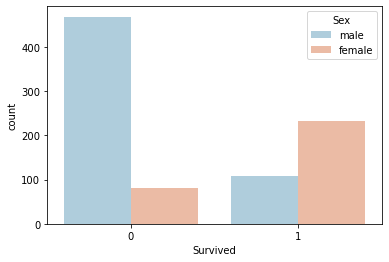

In [12]:
sb.countplot(x='Survived',data=titanic,hue='Sex',palette='RdBu_r')

so we can see comparatively female were more saved than men

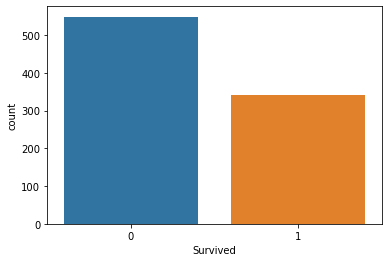

In [13]:
sb.countplot(x='Survived',data=titanic)

so we can say many passengers were not saved

In [14]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)


In [15]:
titanic=pd.concat([titanic,sex],axis=1)


In [16]:
titanic=titanic.drop('Sex',axis=1)

In [17]:
X=titanic.drop('Survived',axis=1)
Y=titanic['Survived']

In [18]:
X

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

In [21]:
clf.score(X,Y)

0.9820426487093153

In [22]:
test=pd.read_csv('titanic_Test.csv')

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test=test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [25]:
sex=pd.get_dummies(test['Sex'],drop_first=True)

In [26]:
test=pd.concat([test,sex],axis=1)

In [27]:
test=test.drop(['Sex'],axis=1)

In [28]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [29]:
test['Age'].isnull().sum()

0

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.9 KB


In [31]:
test.groupby('Pclass').mean()['Fare'].round()

Pclass
1    94.0
2    22.0
3    12.0
Name: Fare, dtype: float64

In [32]:
test['Fare'].isnull().sum()

1

In [33]:
import numpy as np
test.loc[test['Fare'].isnull()]

,Pclass,Age,SibSp,Parch,Fare,male
152,3,60.5,0,0,NaN,1


In [34]:
mean_class1 = test.groupby('Pclass').mean()['Fare'].round().loc[1]
mean_class2 = test.groupby('Pclass').mean()['Fare'].round().loc[2]
mean_class3 = test.groupby('Pclass').mean()['Fare'].round().loc[3]

In [35]:
test.loc[test['Pclass']==3,'Fare'] = test.loc[test['Pclass']==3,'Fare'].fillna(value=mean_class3)

In [36]:
test['Fare'].isnull().sum()

0

In [37]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [38]:
y_pred = clf.predict(test)

In [39]:
clf.score(test,y_pred)

1.0

if we use only titanic_train file which will be divided into training and testing

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=101)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
clf.score(x_train,y_train)

0.9839486356340289

In [44]:
y_pred = clf.predict(x_test)

In [45]:
clf.score(x_test,y_test)

0.7873134328358209

In [46]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
results = confusion_matrix(y_test, y_pred) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred) )
print ('Report : ')
print (classification_report(y_test, y_pred) )

Confusion Matrix :
[[133  21]
 [ 36  78]]
Accuracy Score : 0.7873134328358209
Report : 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



now 78% score we are getting without any hyperparameter tuning. let's do some tuning so that if we could improve some accuracy

In [47]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [48]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [50]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3, 'splitter': 'best'}


In [51]:
grid_search.best_score_

0.8250838709677419

In [52]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =3, min_samples_leaf= 4, min_samples_split= 3, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=3)

In [53]:
clf.score(x_test,y_test)

0.7873134328358209

after hyperparameter tuning testing data score did not improve.so we can assume default classifier is working perfectly.